In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import gmaps 
#from api_keys import gkey
import requests
from scipy.stats import linregress
#import seaborn as sns

#gmaps.configure(api_key=gkey)

ModuleNotFoundError: No module named 'seaborn'

In [21]:
file=pd.read_csv('listings.csv')
file=file.drop(['neighbourhood_group','license','number_of_reviews_ltm','calculated_host_listings_count',
                'host_name','name','host_id','reviews_per_month'],axis=1)
cleaned_data=file.loc[(file['latitude']>= -32.5468)&
                      (file['latitude'] <= -31.7725)&
                      (file['longitude'] <= 116.0593)
                      ]

cleaned_data=cleaned_data.dropna(how='any').sort_values('latitude',ascending=False)
cleaned_data=cleaned_data[(cleaned_data['room_type']=='Entire home/apt')|((cleaned_data['room_type']=='Private room'))]
cleaned_data.drop(cleaned_data[(cleaned_data['neighbourhood']=='PEPPERMINT GROVE')|
                               (cleaned_data['neighbourhood']=='MURRAY')].index, inplace = True)
cleaned_data

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365
5364,38862794,WANNEROO,-31.77287,115.82548,Private room,40,6,18,12/06/2022,348
3423,24808964,WANNEROO,-31.77314,115.87767,Entire home/apt,110,1,178,14/06/2022,330
3070,22778235,JOONDALUP,-31.77332,115.73488,Entire home/apt,128,2,21,27/08/2021,317
3710,27191991,JOONDALUP,-31.77340,115.73292,Entire home/apt,128,2,52,20/05/2022,231
1003,9395509,JOONDALUP,-31.77361,115.73256,Entire home/apt,850,2,12,19/10/2021,231
...,...,...,...,...,...,...,...,...,...,...
4850,34824234,MANDURAH,-32.54627,115.71089,Entire home/apt,600,2,33,12/06/2022,158
1165,10756742,MANDURAH,-32.54628,115.71190,Entire home/apt,995,2,18,27/02/2022,262
8185,52696667,MANDURAH,-32.54635,115.68733,Entire home/apt,186,3,7,16/06/2022,170
8020,52116476,MANDURAH,-32.54639,115.68400,Entire home/apt,523,3,15,16/05/2022,270


In [22]:
#Segregating on room type
private_df = cleaned_data[cleaned_data['room_type'] == 'Private room']
apt_df = cleaned_data[cleaned_data['room_type'] == 'Entire home/apt']


In [23]:
#Segregating based on number of days of stay
#Holiday: 20 days
#short term: 20 to 60 days
#medium term: 60 to 90
#long term: >90 days
cleaned_data = private_df.copy()
bins = [0, 20, 60,90,1000]
group_names = ["Holiday","short term","Medium term","Long Term"]
cleaned_data["Stay classification"] = pd.cut(cleaned_data["minimum_nights"], bins, labels=group_names, include_lowest=True)
cleaned_data

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365,Stay classification
5364,38862794,WANNEROO,-31.77287,115.82548,Private room,40,6,18,12/06/2022,348,Holiday
4169,30162376,SWAN,-31.77423,115.98675,Private room,100,1,2,19/02/2019,342,Holiday
8723,54214407,SWAN,-31.77834,115.99292,Private room,68,3,4,20/05/2022,364,Holiday
4998,35982078,SWAN,-31.78016,115.99217,Private room,42,6,40,22/04/2022,335,Holiday
5151,37272277,SWAN,-31.78034,115.99279,Private room,50,6,16,6/04/2022,139,Holiday
...,...,...,...,...,...,...,...,...,...,...,...
7480,49740161,MANDURAH,-32.52436,115.74105,Private room,85,1,17,12/06/2022,91,Holiday
2194,17672767,MANDURAH,-32.52766,115.76020,Private room,27,1,46,21/12/2019,0,Holiday
6524,45080339,MANDURAH,-32.52845,115.69961,Private room,89,1,38,27/04/2022,302,Holiday
3096,22989423,MANDURAH,-32.53071,115.76852,Private room,55,1,8,1/11/2020,0,Holiday


In [24]:
term_groupby = cleaned_data.groupby(['neighbourhood','Stay classification'])
term_groupby

In [25]:
term_average_price = pd.DataFrame({"Average Price":term_groupby["price"].mean(),
                                 })
term_average_price

Average Price
neighbourhood Stay classification               
ARMADALE      Holiday                  66.153846
              short term                     NaN
              Medium term                    NaN
              Long Term                      NaN
BASSENDEAN    Holiday                  48.571429
...                                          ...
VINCENT       Long Term                      NaN
WANNEROO      Holiday                  49.750000
              short term                     NaN
              Medium term                    NaN
              Long Term                      NaN

[120 rows x 1 columns]

In [26]:
term_average_price.to_csv('avg_price_private_room.csv', encoding='utf-8')               

In [27]:
#Entirehome/ Apt
bins2 = [0, 20, 60,90,1000]
group_names2 = ["Holiday","short term","Medium term","Long Term"]
apt_df["Stay classification"] = pd.cut(apt_df["minimum_nights"], bins2, labels=group_names2, include_lowest=True)
apt_df

C:\Users\bhara\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365,Stay classification
3423,24808964,WANNEROO,-31.77314,115.87767,Entire home/apt,110,1,178,14/06/2022,330,Holiday
3070,22778235,JOONDALUP,-31.77332,115.73488,Entire home/apt,128,2,21,27/08/2021,317,Holiday
3710,27191991,JOONDALUP,-31.77340,115.73292,Entire home/apt,128,2,52,20/05/2022,231,Holiday
1003,9395509,JOONDALUP,-31.77361,115.73256,Entire home/apt,850,2,12,19/10/2021,231,Holiday
2302,18366020,SWAN,-31.77700,116.05288,Entire home/apt,159,1,91,29/05/2022,80,Holiday
...,...,...,...,...,...,...,...,...,...,...,...
4850,34824234,MANDURAH,-32.54627,115.71089,Entire home/apt,600,2,33,12/06/2022,158,Holiday
1165,10756742,MANDURAH,-32.54628,115.71190,Entire home/apt,995,2,18,27/02/2022,262,Holiday
8185,52696667,MANDURAH,-32.54635,115.68733,Entire home/apt,186,3,7,16/06/2022,170,Holiday
8020,52116476,MANDURAH,-32.54639,115.68400,Entire home/apt,523,3,15,16/05/2022,270,Holiday


In [48]:
#Extracting data for few suburbs
values = ["PERTH", "FREMANTLE", "STIRLING"]
apt_df_extract = apt_df.loc[apt_df['neighbourhood'].isin(values)]
apt_df_extract
#term_average_price_2_filter = term_average_price_2.loc[term_average_price_2['neighbourhood'] == "COTTESLOE"]
#term_average_price_2_filter

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365,Stay classification
737,7163360,STIRLING,-31.84670,115.81142,Entire home/apt,103,1,358,12/06/2022,325,Holiday
4310,30899891,STIRLING,-31.84749,115.83357,Entire home/apt,113,2,150,31/05/2022,1,Holiday
1221,11234021,STIRLING,-31.84752,115.78115,Entire home/apt,159,4,42,25/05/2022,312,Holiday
4604,32831459,STIRLING,-31.84785,115.83265,Entire home/apt,97,2,122,22/04/2022,1,Holiday
745,7211420,STIRLING,-31.84916,115.84939,Entire home/apt,306,15,1,8/09/2015,358,Holiday
...,...,...,...,...,...,...,...,...,...,...,...
2335,18602672,FREMANTLE,-32.07628,115.75381,Entire home/apt,500,6,5,11/04/2021,196,Holiday
5578,39895253,FREMANTLE,-32.07629,115.75502,Entire home/apt,821,4,18,14/01/2022,330,Holiday
618,6264217,FREMANTLE,-32.07647,115.75367,Entire home/apt,120,3,53,27/07/2021,16,Holiday
5331,38714504,FREMANTLE,-32.07710,115.75325,Entire home/apt,120,2,73,12/06/2022,285,Holiday


In [49]:
apt_df_extract_groupby = apt_df_extract.groupby(['neighbourhood','Stay classification'])
apt_df_extract_groupby

In [50]:
apt_df_extract_average_price = pd.DataFrame({"Average Price":apt_df_extract_groupby["price"].mean(),
                                 })
apt_df_extract_average_price

Average Price
neighbourhood Stay classification               
FREMANTLE     Holiday                 177.340237
              short term              141.428571
              Medium term             180.000000
              Long Term               219.000000
PERTH         Holiday                 162.404669
              short term              160.000000
              Medium term             117.000000
              Long Term               197.750000
STIRLING      Holiday                 193.075000
              short term              154.714286
              Medium term             350.000000
              Long Term               185.500000

In [54]:
apt_df_extract_average_price = apt_df_extract_average_price.replace(np.nan,0)
apt_df_extract_average_price

Average Price
neighbourhood Stay classification               
FREMANTLE     Holiday                 177.340237
              short term              141.428571
              Medium term             180.000000
              Long Term               219.000000
PERTH         Holiday                 162.404669
              short term              160.000000
              Medium term             117.000000
              Long Term               197.750000
STIRLING      Holiday                 193.075000
              short term              154.714286
              Medium term             350.000000
              Long Term               185.500000

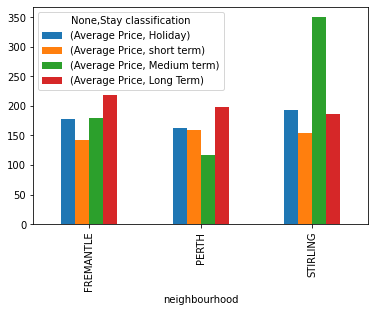

In [52]:
apt_df_extract_average_price.unstack().plot.bar()
#legend("topright",
#      legend)

In [55]:
apt_df_extract_average_price.unstack().plot(x = 'Stay classification', y = 'Average Price', hue = 'neighbourhood')

KeyError: 'Stay classification'

In [ ]:
labels=['Apt_365','PR_365']
plt.xticks(tick_locations,x_ticks,rotation=45)
plt.title('Annual Availability by Room Types')
plt.xlabel('Neighbourhoods Sorted by Latitude')
plt.ylabel('Annually Available Days')
plt.xlim(-0.8,30)
plt.ylim(0,350)
plt.legend(labels);

In [ ]:
x_ticks=apt_df_extract_average_price['neighbourhood']
x_axis=np.arange(len(x_ticks))
xvalue=final_df['Holiday']
x1value=final_df['Short term']
x2value=final_df['Medium term']
x3value=final_df['Medium term']
plt.figure(figsize=(25, 10))
plt.bar(x_axis-0.15,xvalue,facecolor='green',align='center',width=0.3,)
plt.bar(x_axis+0.15,x1value,facecolor='orange',align='center',width=0.3)
for x,y in enumerate(final_df['Holidays']):
    plt.text(x-0.15,y+10,'%s'%y,ha='center')
for x,y in enumerate(final_df['Short term']):
    plt.text(x+0.15,y+10,'%s'%y,ha='center')
for x,y in enumerate(final_df['Short term']):
    plt.text(x+0.15,y+10,'%s'%y,ha='center')

tick_locations = [value for value in x_axis]
labels=['Apt_365','PR_365']
plt.xticks(tick_locations,x_ticks,rotation=45)
plt.title('Annual Availability by Room Types')
plt.xlabel('Neighbourhoods Sorted by Latitude')
plt.ylabel('Annually Available Days')
plt.xlim(-0.8,30)
plt.ylim(0,350)
plt.legend(labels);

In [28]:
term_groupby_2 = apt_df.groupby(['neighbourhood','Stay classification'])
term_groupby_2

In [18]:
term_groupby_2['neighbourhood']

In [12]:
term_average_price_2 = pd.DataFrame({"Average Price":term_groupby_2["price"].mean(),
                                 })
term_average_price_2

Average Price
neighbourhood Stay classification               
ARMADALE      Holiday                 172.470588
              short term              160.000000
              Medium term                    NaN
              Long Term                      NaN
BASSENDEAN    Holiday                 132.928571
...                                          ...
VINCENT       Long Term                74.666667
WANNEROO      Holiday                 129.888889
              short term                     NaN
              Medium term                    NaN
              Long Term                      NaN

[120 rows x 1 columns]

In [14]:
term_average_price_2.to_csv('avg_price_entire_apt.csv', encoding='utf-8')    

In [17]:
term_average_price_2['neighbourhood']

KeyError: 'neighbourhood'

In [19]:
values = ["COTTESLOE", "FREMANTLE", "JOONDALUP", "MELVILLE"]
term_average_price_2_filter = term_average_price_2.loc[term_average_price_2['neighbourhood'] == "COTTESLOE"]
term_average_price_2_filter

KeyError: 'neighbourhood'

In [ ]:
x_ticks=term_average_price_2['neighbourhood']
x_axis=np.arange(len(x_ticks))
xvalue=final_df['Holidays']
x1value=final_df['Short term']
x2value=final_df['Medium term']
x3value=final_df['Medium term']
plt.figure(figsize=(25, 10))
plt.bar(x_axis-0.15,xvalue,facecolor='green',align='center',width=0.3,)
plt.bar(x_axis+0.15,x1value,facecolor='orange',align='center',width=0.3)
for x,y in enumerate(final_df['Apt_365']):
    plt.text(x-0.15,y+10,'%s'%y,ha='center')
for x,y in enumerate(final_df['PR_365']):
    plt.text(x+0.15,y+10,'%s'%y,ha='center')


tick_locations = [value for value in x_axis]
labels=['Apt_365','PR_365']
plt.xticks(tick_locations,x_ticks,rotation=45)
plt.title('Annual Availability by Room Types')
plt.xlabel('Neighbourhoods Sorted by Latitude')
plt.ylabel('Annually Available Days')
plt.xlim(-0.8,30)
plt.ylim(0,350)
plt.legend(labels);